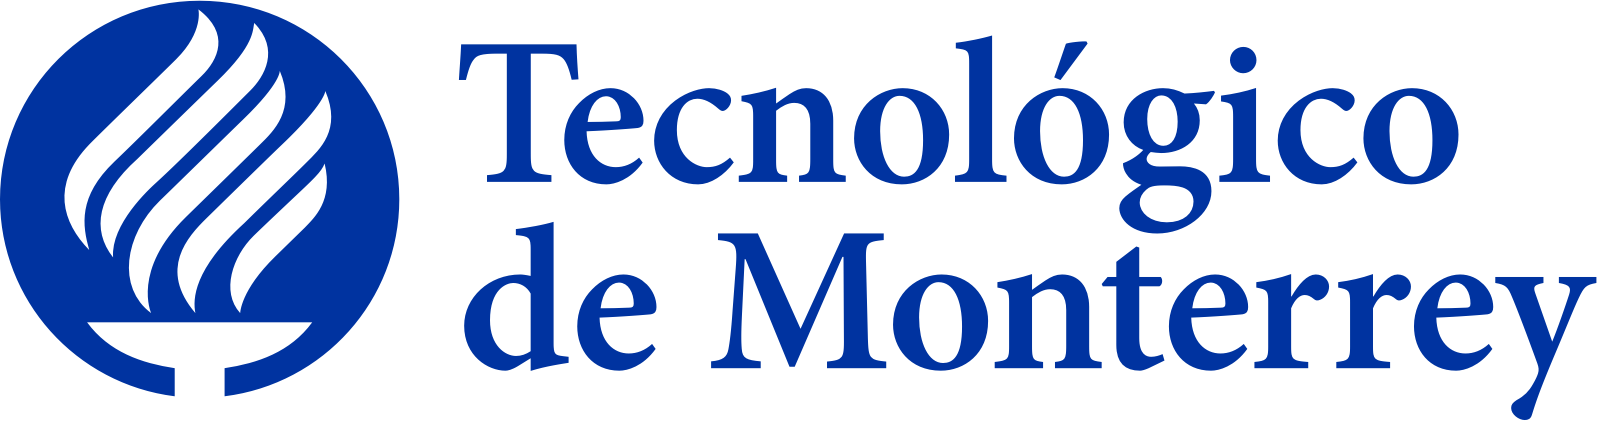

José Juan Suárez Ramos<br>
A01224078<br>
Tarea 3

# Activación Sigmoide

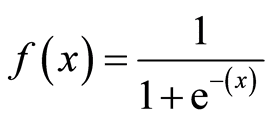

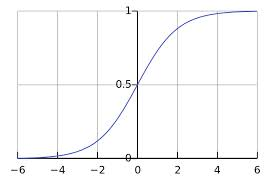

# Tangente Hiperbólica

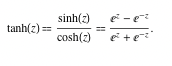

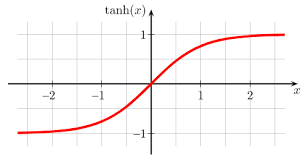

# ReLU
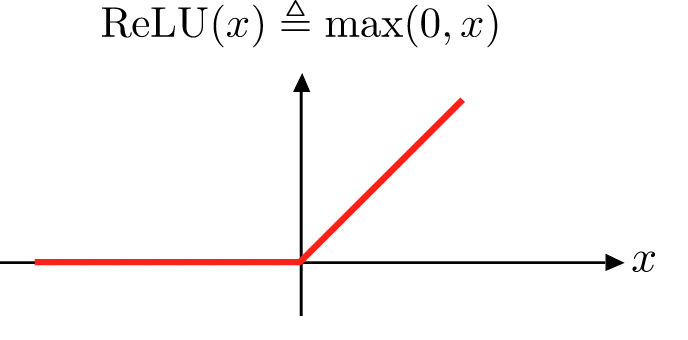

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix


from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers



### Generación y visualización de los datos 2D:

In [2]:
N = 10000
semilla1 = 23

#noisy_data = sklearn.datasets.make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=5.0, random_state=semilla1)
noisy_data = sklearn.datasets.make_moons(n_samples=N, noise= 0.4, random_state=semilla1 ) 
#noisy_data = sklearn.datasets.make_gaussian_quantiles(n_samples=N, n_features=2, n_classes=2, random_state=semilla1) 
#noisy_data = sklearn.datasets.make_circles(n_samples=N, noise=.20, random_state=semilla1, factor=0.7)  

In [3]:
X, Y = noisy_data
Y = Y.reshape(Y.shape[0],1)

In [4]:
print(X.shape)
print(Y.shape)

(10000, 2)
(10000, 1)


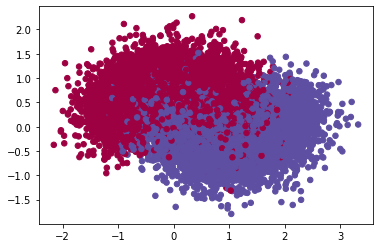

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=30, cmap=plt.cm.Spectral);

### Partición de los conjuntos de Entrenamiento, Validación y Prueba:

In [6]:
semilla2 = 23

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=66 , random_state=17 )        
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=33, random_state=semilla2 )  

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(9934, 2)
(9934, 1)
(33, 2)
(33, 1)
(33, 2)
(33, 1)


In [8]:
n_epochs = 400   
n_neurons = 2

In [9]:
model = Sequential()

model.add( Dense(units = n_neurons, input_dim=2, activation='sigmoid' ) )   # activity_regularizer= $$$

model.add( Dense(units=1, activation='sigmoid' ) )


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
H = model.fit(x=X_train, y=Y_train, epochs=n_epochs, validation_data=(X_val, Y_val))

Epoch 1/400
311/311 [==============================] - 1s 3ms/step - loss: 0.6969 - accuracy: 0.5406 - val_loss: 0.6200 - val_accuracy: 0.9091
Epoch 2/400
311/311 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.7973 - val_loss: 0.5517 - val_accuracy: 0.9091
Epoch 3/400
311/311 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.7998 - val_loss: 0.5004 - val_accuracy: 0.8788
Epoch 4/400
311/311 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.8150 - val_loss: 0.4581 - val_accuracy: 0.8788
Epoch 5/400
311/311 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.8160 - val_loss: 0.4250 - val_accuracy: 0.8788
Epoch 6/400
311/311 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.8225 - val_loss: 0.4005 - val_accuracy: 0.8788
Epoch 7/400
311/311 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8198 - val_loss: 0.3842 - val_accuracy: 0.8788

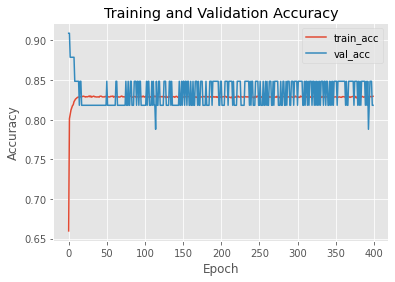

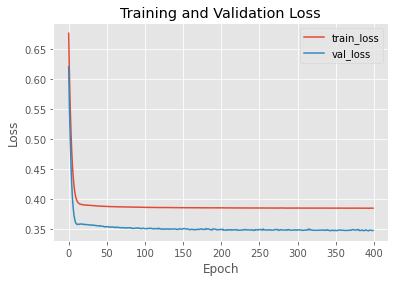

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Predicciones, Precisión (Accuracy) y Matriz de Confusión

In [12]:
predictions = np.round(model.predict(X_test ))

cm = confusion_matrix(Y_test, predictions)

total = sum(sum(cm))
my_accuracy = (cm[0, 0] + cm[1, 1]) / total

print(cm)
print("\n Test_Accuracy: {:.4f}".format(my_accuracy))



[[12  5]
 [ 0 16]]

 Test_Accuracy: 0.8485


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


b) El modelo tiene nueve parámetros. <br> Se utilizó 400 épocas las cuales al aumentar o disminuir no cambiaron mucho los resultados.<br>
c) Accuracy de Val: 81 Train: 82 y Test: 93



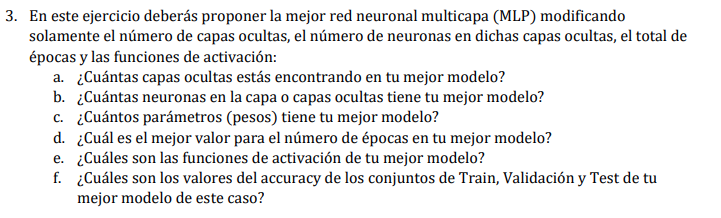

In [14]:
semilla2 = 23

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=66 , random_state=17 )        
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=33, random_state=semilla2 )  

In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(9934, 2)
(9934, 1)
(33, 2)
(33, 1)
(33, 2)
(33, 1)


In [16]:
n_epochs = 500
n_neurons = 16

In [17]:
model_2 = Sequential()

model_2.add( Dense(units =16, input_dim=2, activation='sigmoid' ) )   # activity_regularizer= $$$

model_2.add( Dense(units = 8, activation='sigmoid' ) )   #
model_2.add( Dense(units = 4, activation='sigmoid' ) )   #
model_2.add( Dense(units = 2, activation='sigmoid' ) )   #

model_2.add( Dense(units=1, activation='sigmoid' ) )


model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
H = model_2.fit(x=X_train, y=Y_train, epochs=n_epochs, validation_data=(X_val, Y_val))

Epoch 1/500
311/311 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4979 - val_loss: 0.6937 - val_accuracy: 0.4242
Epoch 2/500
311/311 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5373 - val_loss: 0.6496 - val_accuracy: 0.8182
Epoch 3/500
311/311 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.8119 - val_loss: 0.5613 - val_accuracy: 0.8485
Epoch 4/500
311/311 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.8288 - val_loss: 0.4947 - val_accuracy: 0.8182
Epoch 5/500
311/311 [==============================] - 1s 2ms/step - loss: 0.4983 - accuracy: 0.8228 - val_loss: 0.4580 - val_accuracy: 0.8182
Epoch 6/500
311/311 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.8335 - val_loss: 0.4401 - val_accuracy: 0.8182
Epoch 7/500
311/311 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8324 - val_loss: 0.4289 - val_accuracy: 0.8182

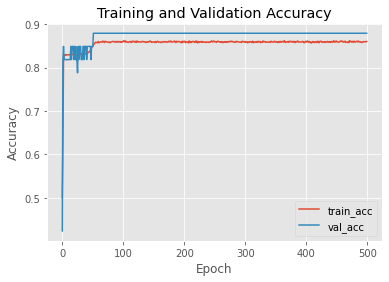

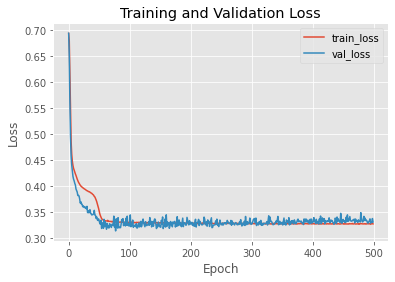

In [19]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Predicciones, Precisión (Accuracy) y Matriz de Confusión

In [20]:
predictions = np.round(model_2.predict(X_test ))

cm = confusion_matrix(Y_test, predictions)

total = sum(sum(cm))
my_accuracy = (cm[0, 0] + cm[1, 1]) / total

print(cm)
print("\n Test_Accuracy: {:.4f}".format(my_accuracy))



[[14  3]
 [ 0 16]]

 Test_Accuracy: 0.9091


In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________





a) Encontré tres capas ocultas en mi mejor modelo<br>
b) El modelo tiene 182 neuronas en las capas ocultas.<br> 
c) El modelo tiene 233 parámetros totales.<br>
e) La mejor función de activiación que encontré fue la de sigmoide<br>
f) Acurracy de:
*  Test: 90
*  Val: 87
*  Train: 86






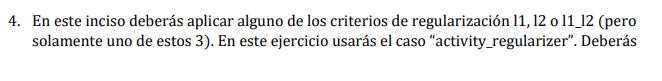
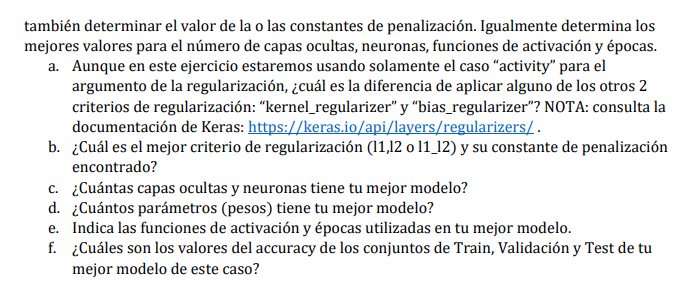

In [22]:
semilla2 = 23

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=66 , random_state=17 )        
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=33, random_state=semilla2 )  

In [23]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(9934, 2)
(9934, 1)
(33, 2)
(33, 1)
(33, 2)
(33, 1)


In [24]:
n_epochs = 500
n_neurons = 16

In [25]:
model_3 = Sequential()

model_3.add( Dense(units =16, input_dim=2, activation='sigmoid', activity_regularizer="l1" ) )   # activity_regularizer= $$$

model_3.add( Dense(units = 8, activation='sigmoid' ) )   #
model_3.add( Dense(units = 4, activation='sigmoid' ) )   #
model_3.add( Dense(units = 2, activation='sigmoid' ) )   #

model_3.add( Dense(units=1, activation='sigmoid' ) )


model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
H = model_3.fit(x=X_train, y=Y_train, epochs=n_epochs, validation_data=(X_val, Y_val))

Epoch 1/500
311/311 [==============================] - 1s 2ms/step - loss: 0.8036 - accuracy: 0.4984 - val_loss: 0.7646 - val_accuracy: 0.4242
Epoch 2/500
311/311 [==============================] - 0s 1ms/step - loss: 0.7517 - accuracy: 0.4900 - val_loss: 0.7403 - val_accuracy: 0.4242
Epoch 3/500
311/311 [==============================] - 1s 2ms/step - loss: 0.7330 - accuracy: 0.5038 - val_loss: 0.7192 - val_accuracy: 0.5758
Epoch 4/500
311/311 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.6616 - val_loss: 0.6448 - val_accuracy: 0.8182
Epoch 5/500
311/311 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.8029 - val_loss: 0.5694 - val_accuracy: 0.8485
Epoch 6/500
311/311 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.8264 - val_loss: 0.5236 - val_accuracy: 0.8485
Epoch 7/500
311/311 [==============================] - 1s 2ms/step - loss: 0.5206 - accuracy: 0.8196 - val_loss: 0.4950 - val_accuracy: 0.8485

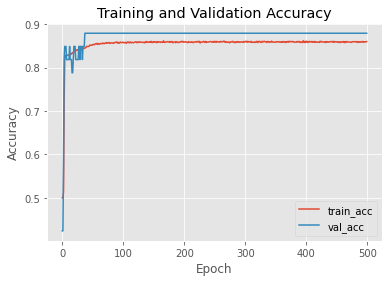

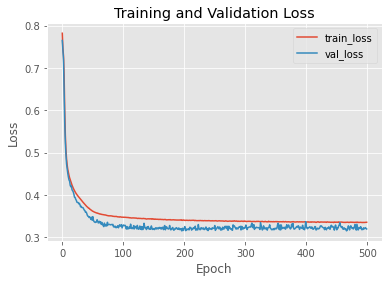

In [27]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Predicciones, Precisión (Accuracy) y Matriz de Confusión

In [28]:
predictions = np.round(model_3.predict(X_test ))

cm = confusion_matrix(Y_test, predictions)

total = sum(sum(cm))
my_accuracy = (cm[0, 0] + cm[1, 1]) / total

print(cm)
print("\n Test_Accuracy: {:.4f}".format(my_accuracy))



[[14  3]
 [ 0 16]]

 Test_Accuracy: 0.9091


In [29]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


A) El kernel_regulizer es la función la cual se aplica a los pesos excluyendo los bias. El bias_regulizar hace lo que prácticamente el nombre dice, reduce los bias de la red de salida. <br>
B) El mejor criterio de regulazación de este modelo fue el l1
C) Este modelo tupo 3 capas oculas y 31 neuronas. <br>
D) 

# 5) Resumen de resultados

Los modelos pueden mejorar todavía más. Al utilizar más capas ocultas se logró incrementar el accuracy de los modelos pero del mismo modo se afectó la validez de ciertos accuracies ya que llegaron a ser mayores en los casos de prueba contra los de entrenamiento. Al usuar menos capas se obtuvo mayores accuracies en los datos de prueba contra los de entramiento y el utilizar más capas ocultas y neuronas normalizo más estos resultados. 

El mejor de todo en mi opinón es el tercer modelo donde se utilizo la regularización de actividad lo cual mostró un mejor resultado en el costo de los datos de prueba y entrenamiento a través de las épocas y donde el accuracy fue más alta sin una diferencia tan alta contra los accuracies de entrenamiento y validación. 

Sin duda, estos modelos no son confiables debido a las validaciones que vimos en clase. Se tienen que mejorar y encontrar los parámetros adecuados. 

# 6) Matriz de Confución

La matriz de confución es una medición de rendimiento sobre un modelo de machine learning. 
En nuestro último modelo podemos ver que obtuvo 3 falsos positivos para el atributo 0. Como tal los resultados de esta matrix de confusión no son malos pero al analizarlos contra los otros datos obtenidos en el modelo se pone en duda su certeza. 

In [31]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

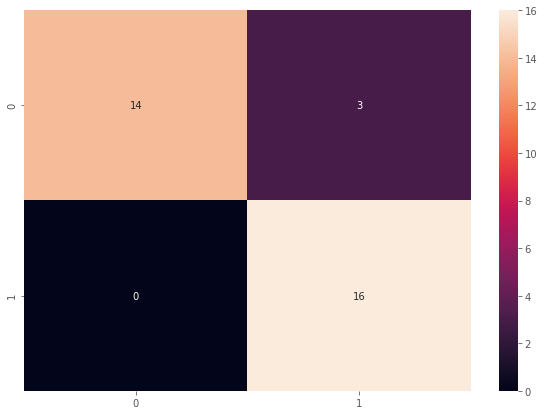

In [32]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)